### Chp1 - exercises

In [916]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from numpy import random
from datetime import timedelta
import numpy as np 
import seaborn as sns
from datetime import datetime
import dateutil.parser as parser
from sklearn.linear_model import LinearRegression #sklearn for our regression models
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_1samp  #Hypothesis Testing
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter
%matplotlib inline

#cell styler logic
def highlight_cells(val):
    if val < 0:
        font_color = 'red'
    elif val > 0:
        font_color = 'green'
    else:
        font_color = ''
#    font_color = 'red' if val <= 0 elif val > 0 'green' else ''
    return 'background-color: {}'.format(font_color)


## Unfinished Code

print('Type Error is {}'.format(type(ts)))

def format_ts_text_file(ts):
    
    df_to_format = load_text_file(df)
    df_to_format[["ibmrtn","vwrtn","ewrtn","sprtn"]] = df_to_format[["ibmrtn","vwrtn","ewrtn","sprtn"]].str.split(expand=True)
    df_to_format[["ibmrtn","vwrtn","ewrtn","sprtn"]] = df_to_format[["ibmrtn","vwrtn","ewrtn","sprtn"]].astype('float')
        
    return df_to_format    
    
format_ts_text_file  


#### Automation of data wrangling process

    - Create a Class
    - Set arbitrary number of parameters to add 
    - add input function to take in parameters append to list, then turn to DF.
    
  

In [943]:
#load file nad create df 

def load_text_file(file):
    """
    -deal with 0 values later, for now skip
    """
    #cols = ['date', 'axb', 'cat', 'sbux']
    cols = ["date","ibmrtn","vwrtn","ewrtn","sprtn"]
    custom_date_wrapper = [lambda x: datetime.strptime(x, "%y-%m-%d")]
    formated_file = pd.read_fwf(file,
                               names=cols,
                               index_col=False,
                               day_first=False, 
                               delimeter=',')
    #formated_file = formated_file.set_index('date')
    formated_file = formated_file.drop(0)
    formated_file['date'] = pd.to_datetime(formated_file['date'])
    formated_file.set_index('date', inplace=True)
    
   
    return formated_file
ts = load_text_file('/Users/mamoudoudiallo/modeling_projects/datasets/AFTS/Ch01/m-ibm3dx2608.txt')

#datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
#datetime.strptime(ts.index[0], "%y%m:%d")

ts

,ibmrtn,vwrtn,ewrtn,sprtn
date,,,,
1926-01-30,-0.010381,0.000724,0.023174,0.022472
1926-02-27,-0.024476,-0.033374,-0.053510,-0.043956
1926-03-31,-0.115591,-0.064341,-0.096824,-0.059113
1926-04-30,0.089783,0.038358,0.032946,0.022688
1926-05-28,0.036932,0.012172,0.001035,0.007679
...,...,...,...,...
2008-08-29,-0.044929,0.011042,0.014066,0.012191
2008-09-30,-0.039185,-0.098060,-0.120888,-0.090791
2008-10-31,-0.205113,-0.184726,-0.206004,-0.169425


In [860]:
def compute_simple_stats(df):
    #
    #df[['axb_pct', 'cat_pct', 'sbux_pct']] = df[['axb', 'cat', 'sbux']].pct_change()
    df['sample_mean'] = df.mean(1, skipna=True)
    df['std'] = df.std(1, skipna=True)
    df['skewness'] = df.skew(1, skipna=True)
    df['min_pct_change'] = df.min(1, skipna=True)
    df['max_pct_change'] = df.min(1, skipna=True)
        
    return df
#.style.applymap(highlight_cells, subset = ['axb', 'cat', 'sbux'])
compute_simple_stats(single_stocks_df)

,axb,cat,sbux,axb_pct,cat_pct,sbux_pct,sample_mean,std,skewness,min_pct_change,max_pct_change,axb_log,cat_log,sbux_log,axb_log_pct,cat_log_pct,sbux_log_pct
date,,,,,,,,,,,,,,,,,
1999-01-04,-0.009756,0.029891,-0.040089,NaN,NaN,NaN,-0.235313,0.348255,0.036660,-0.654275,-0.654275,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,-0.019089,-0.002639,-0.034803,0.956642,-1.088287,-0.131857,-0.189831,0.678090,0.011950,-1.088287,-1.088287,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,0.043063,0.026455,-0.008413,-3.255907,-11.024631,-0.758268,-3.205693,5.508334,-0.468098,-11.024631,-11.024631,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,0.012063,0.009021,0.003636,-0.719876,-0.659006,-1.432188,-0.577187,0.738728,0.318067,-1.432188,-1.432188,-1.272521,-1.075890,NaN,NaN,NaN,NaN
1999-01-08,0.030393,0.042146,0.021739,1.519523,3.671988,4.978823,0.527035,2.131624,0.298366,-2.432846,-2.432846,0.924069,1.541585,1.788224,-1.726172,-2.432846,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24,0.000557,0.018964,0.016322,-1.022304,-2.218923,-1.898690,-0.683502,1.060997,-0.406321,-2.218923,-2.218923,NaN,NaN,NaN,0.000000,0.000000,0.000000
2008-12-26,-0.003339,0.019327,0.001071,-6.994614,0.019142,-0.934383,-1.558343,2.940164,-1.083676,-6.994614,-6.994614,NaN,0.018961,-2.723921,0.000000,-1.028587,0.392797
2008-12-29,-0.011725,-0.008895,-0.034225,2.511530,-1.460237,-32.956116,-6.461168,15.068812,-1.133467,-32.956116,-32.956116,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [959]:
def transform_returns_to_logs(df):
    
    df[['axb_log', 'cat_log', 'sbux_log']] = np.log(df[['axb', 'cat', 'sbux']]).diff()
    df[['axb_log_pct', 'cat_log_pct', 'sbux_log_pct']] = df[['axb_log', 'cat_log', 'sbux_log']].pct_change()
    df = df[['axb_log', 'cat_log', 'sbux_log','axb_log_pct', 'cat_log_pct', 'sbux_log_pct']] 
    return df

transform_returns_to_logs(single_stocks_df)
    

,axb_log,cat_log,sbux_log,axb_log_pct,cat_log_pct,sbux_log_pct
date,,,,,,
1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,-1.272521,-1.075890,NaN,NaN,NaN,NaN
1999-01-08,0.924069,1.541585,1.788224,-1.726172,-2.432846,NaN
...,...,...,...,...,...,...
2008-12-24,NaN,NaN,NaN,0.000000,0.000000,0.000000
2008-12-26,NaN,0.018961,-2.723921,0.000000,-1.028587,0.392797
2008-12-29,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [944]:
def compute_null_hypt(df):
    #Adjusted Problem    
    """df = df['1999-01-08': '1999-01-10']
    df['axb_log'] = np.log(df['axb']).diff()
    df['cat_log'] = np.log(df['cat']).diff()
    df['sbux_log'] = np.log(df['sbux']).diff()
    df = df[['axb_log', 'cat_log', 'sbux_log']]"""
    
    df[['axb_pct', 'cat_pct', 'sbux_pct']] = df[['axb', 'cat', 'sbux']].pct_change()
    df = df[['axb_pct', 'cat_pct', 'sbux_pct']]
    for i in df.columns:
        tset, pval = ttest_1samp(df[i], 0)
        print("p-values",pval)
        if pval < 0.05:    
            print(" we are rejecting null hypothesis for stock {}".format(i))
        else:
            print("we are accepting null hypothesis for stock {}".format(i))
    return df

compute_null_hypt(single_stocks_df)
    

p-values nan
we are accepting null hypothesis for stock axb_pct
p-values nan
we are accepting null hypothesis for stock cat_pct
p-values nan
we are accepting null hypothesis for stock sbux_pct


,axb_pct,cat_pct,sbux_pct
date,,,
1999-01-04,NaN,NaN,NaN
1999-01-05,0.956642,-1.088287,-0.131857
1999-01-06,-3.255907,-11.024631,-0.758268
1999-01-07,-0.719876,-0.659006,-1.432188
1999-01-08,1.519523,3.671988,4.978823
...,...,...,...
2008-12-24,-1.022304,-2.218923,-1.898690
2008-12-26,-6.994614,0.019142,-0.934383
2008-12-29,2.511530,-1.460237,-32.956116


### 1.2. 

In [960]:
ts = load_text_file('/Users/mamoudoudiallo/modeling_projects/datasets/AFTS/Ch01/m-ibm3dx2608.txt')
ts[["ibmrtn","vwrtn","ewrtn","sprtn"]] = ts[["ibmrtn","vwrtn","ewrtn","sprtn"]].astype('float')


def compute_simple_stats(df):
    #
    df[['ibmrtn_pct', 'vwrtn_pct', 'ewrtn_pct', 'sprtn_pct']] = df[['ibmrtn', 'vwrtn', 'ewrtn', 'sprtn']].pct_change()
    df['sample_mean'] = df.mean(1, skipna=True)
    df['std'] = df.std(1, skipna=True)
    df['skewness'] = df.skew(1, skipna=True)
    df['excess kurtosis'] = df.kurt(1, skipna=True)
    df['min_pct_change'] = df.min(1, skipna=True)
    df['max_pct_change'] = df.min(1, skipna=True)
        
    return df
display(compute_simple_stats(ts))


,ibmrtn,vwrtn,ewrtn,sprtn,ibmrtn_pct,vwrtn_pct,ewrtn_pct,sprtn_pct,sample_mean,std,skewness,excess kurtosis,min_pct_change,max_pct_change
date,,,,,,,,,,,,,,
1926-01-30,-0.010381,0.000724,0.023174,0.022472,NaN,NaN,NaN,NaN,0.008997,0.014375,-0.633164,6.946232,-0.633164,-0.633164
1926-02-27,-0.024476,-0.033374,-0.053510,-0.043956,1.357769,-47.096685,-3.309053,-2.956034,-6.519915,15.409256,-2.332306,7.765661,-47.096685,-47.096685
1926-03-31,-0.115591,-0.064341,-0.096824,-0.059113,3.722626,0.927878,0.809456,0.344822,0.683614,1.213712,2.196561,2.665869,-0.115591,-0.115591
1926-04-30,0.089783,0.038358,0.032946,0.022688,-1.776730,-1.596167,-1.340267,-1.383807,-0.739150,0.794996,-0.003294,-1.460278,-1.776730,-1.776730
1926-05-28,0.036932,0.012172,0.001035,0.007679,-0.588653,-0.682674,-0.968585,-0.661539,-0.355454,0.383917,-0.128677,-0.888592,-0.968585,-0.968585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-29,-0.044929,0.011042,0.014066,0.012191,-1.563536,-1.839696,-15.150905,-2.236535,-2.599788,4.825874,-2.096050,6.729005,-15.150905,-15.150905
2008-09-30,-0.039185,-0.098060,-0.120888,-0.090791,-0.127846,-9.880638,-9.594341,-8.447379,-3.549891,4.475952,-0.464682,-0.767206,-9.880638,-9.880638
2008-10-31,-0.205113,-0.184726,-0.206004,-0.169425,4.234477,0.883806,0.704090,0.866099,0.740401,1.401766,2.116983,3.355204,-0.206004,-0.206004


In [947]:
def transform_returns_to_logs(df):
    
    df[["ibmrtn_log","vwrtn_log","ewrtn_log","sprtn_log"]] = np.log(df[["ibmrtn","vwrtn","ewrtn","sprtn"]]).diff()
    df[['ibmrtn_log_pct', 'vwrtn_log_pct', 'ewrtn_log_pct', "sprtn_log"]] = df[["ibmrtn_log","vwrtn_log","ewrtn_log","sprtn_log"]].pct_change()
    #df = df[['axb_log', 'cat_log', 'sbux_log','axb_log_pct', 'cat_log_pct', 'sbux_log_pct']] 
    return df

transform_returns_to_logs(ts)
    

,ibmrtn,vwrtn,ewrtn,sprtn,ibmrtn_pct,vwrtn_pct,ewrtn_pct,sprtn_pct,sample_mean,std,...,excess kurtosis,min_pct_change,max_pct_change,ibmrtn_log,vwrtn_log,ewrtn_log,sprtn_log,ibmrtn_log_pct,vwrtn_log_pct,ewrtn_log_pct
date,,,,,,,,,,,,,,,,,,,,,
1926-01-30,-0.010381,0.000724,0.023174,0.022472,NaN,NaN,NaN,NaN,0.008997,0.014375,...,6.946232,-0.633164,-0.633164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-02-27,-0.024476,-0.033374,-0.053510,-0.043956,1.357769,-47.096685,-3.309053,-2.956034,-6.519915,15.409256,...,7.765661,-47.096685,-47.096685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-03-31,-0.115591,-0.064341,-0.096824,-0.059113,3.722626,0.927878,0.809456,0.344822,0.683614,1.213712,...,2.665869,-0.115591,-0.115591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-04-30,0.089783,0.038358,0.032946,0.022688,-1.776730,-1.596167,-1.340267,-1.383807,-0.739150,0.794996,...,-1.460278,-1.776730,-1.776730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-05-28,0.036932,0.012172,0.001035,0.007679,-0.588653,-0.682674,-0.968585,-0.661539,-0.355454,0.383917,...,-0.888592,-0.968585,-0.968585,-0.888317,-1.147825,-3.460468,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-29,-0.044929,0.011042,0.014066,0.012191,-1.563536,-1.839696,-15.150905,-2.236535,-2.599788,4.825874,...,6.729005,-15.150905,-15.150905,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2008-09-30,-0.039185,-0.098060,-0.120888,-0.090791,-0.127846,-9.880638,-9.594341,-8.447379,-3.549891,4.475952,...,-0.767206,-9.880638,-9.880638,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2008-10-31,-0.205113,-0.184726,-0.206004,-0.169425,4.234477,0.883806,0.704090,0.866099,0.740401,1.401766,...,3.355204,-0.206004,-0.206004,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [948]:
transform_returns_to_logs(ts)[['sprtn_log']]

,sprtn_log
date,
1926-01-30,NaN
1926-02-27,NaN
1926-03-31,NaN
1926-04-30,NaN
1926-05-28,NaN
...,...
2008-08-29,0.0
2008-09-30,0.0
2008-10-31,0.0


In [949]:
sprtn_log = transform_returns_to_logs(ts)[['sprtn_log']]

sprtn_log.replace([np.inf, -np.inf], np.nan, inplace=True)
sprtn_log.dropna(inplace=True)

avg_annual_log = sprtn_log['sprtn_log'].mean()

#avg_annual_log = sprtn_log.loc[sprtn_log['sprtn_log'] >=0.001].mean()
#avg_annual_log.info
print('AVG Annual Log Return of SnP is: {}'.format(avg_annual_log))



AVG Annual Log Return of SnP is: -0.4941671701335173


## 1.4

In [953]:
ibm_skew = round(compute_simple_stats(ts)['ibmrtn'], 4)
tset, pval = ttest_1samp(ibm_skew, 0)
print("p-values",pval)
if pval < 0.05:    
    print(" we are rejecting null hypothesis: That Skewness measure of the returns is zero")
else:
    print("we are accepting null hypothesis:  That Skewness measure of the returns is zero")


p-values 3.9552032537330925e-09
 we are rejecting null hypothesis: That Skewness measure of the returns is zero


In [958]:
ibm_kurt = round(compute_simple_stats(ts)['ibmrtn'], 4)
tset, pval = ttest_1samp(ibm_kurt, 0)
print("p-values",pval)


p-values 3.9552032537330925e-09


In [952]:
compute_simple_stats(ts)[['ibmrtn', 'skewness', 'excess kurtosis']]

,ibmrtn,skewness,excess kurtosis
date,,,
1926-01-30,-0.010381,1.691947,2.804975
1926-02-27,-0.024476,-1.111808,0.223494
1926-03-31,-0.115591,1.462058,2.156657
1926-04-30,0.089783,0.344557,-1.501469
1926-05-28,0.036932,-0.588488,0.393375
...,...,...,...
2008-08-29,-0.044929,-1.493445,1.394420
2008-09-30,-0.039185,-0.755419,-0.824115
2008-10-31,-0.205113,1.824661,3.038420


#### Random Forest Model 

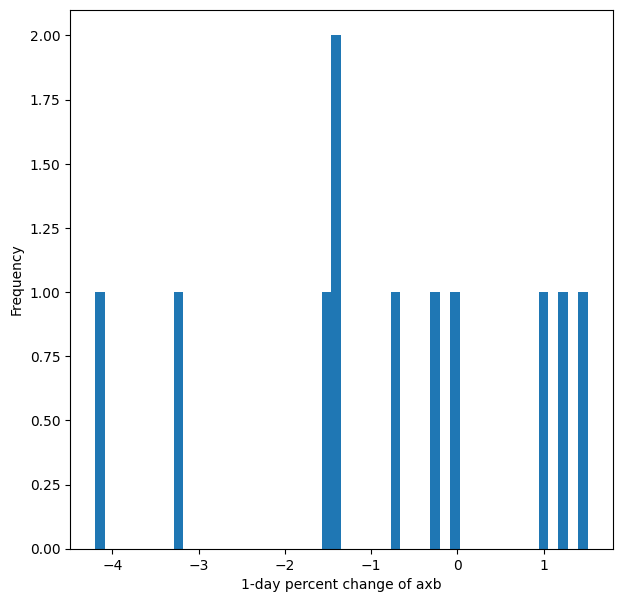

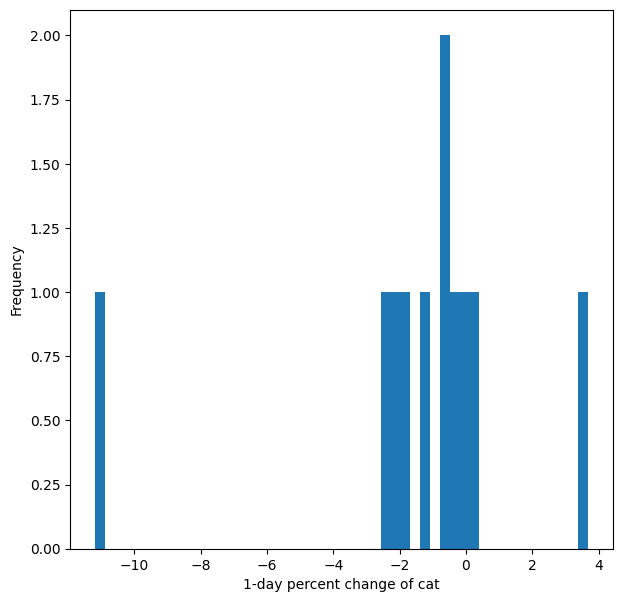

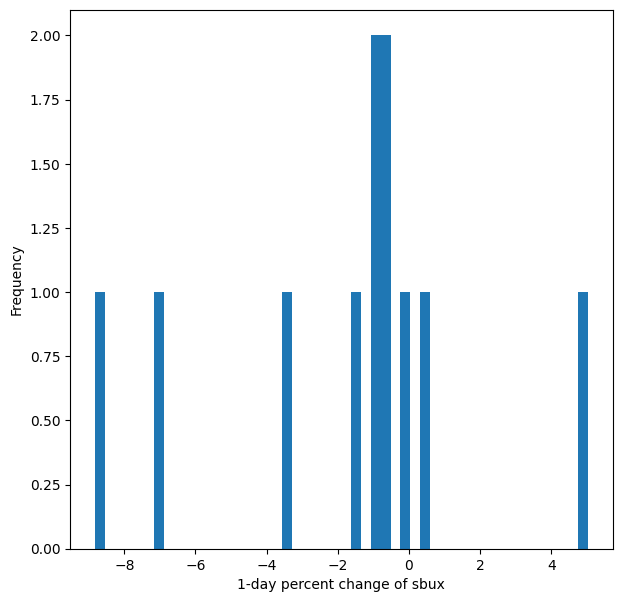

In [346]:
def plot_daily_pct_change(df):
    for i in single_stocks_df.columns:
        plt.figure(figsize=(7,7))
        #df[np.isfinite(column_name)].astype('float64').pct_change().plot.hist(bins=50)
        round(df[i], 4).head(12).pct_change().plot.hist(bins=50)
        #names = [i for i in list(df.columns)]
        plt.xlabel('1-day percent change of {}'.format(i))
    return plt.show()

plot_daily_pct_change(single_stocks_df)

If Normalize? : Y Else NY


/var/folders/1w/cbp5zn894g56r4066l_mngv40000gn/T/ipykernel_43082/1311603549.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


If Normalize? : Y Else NN
AxesSubplot(0.125,0.11;0.775x0.77) AxesSubplot(0.125,0.11;0.775x0.77)


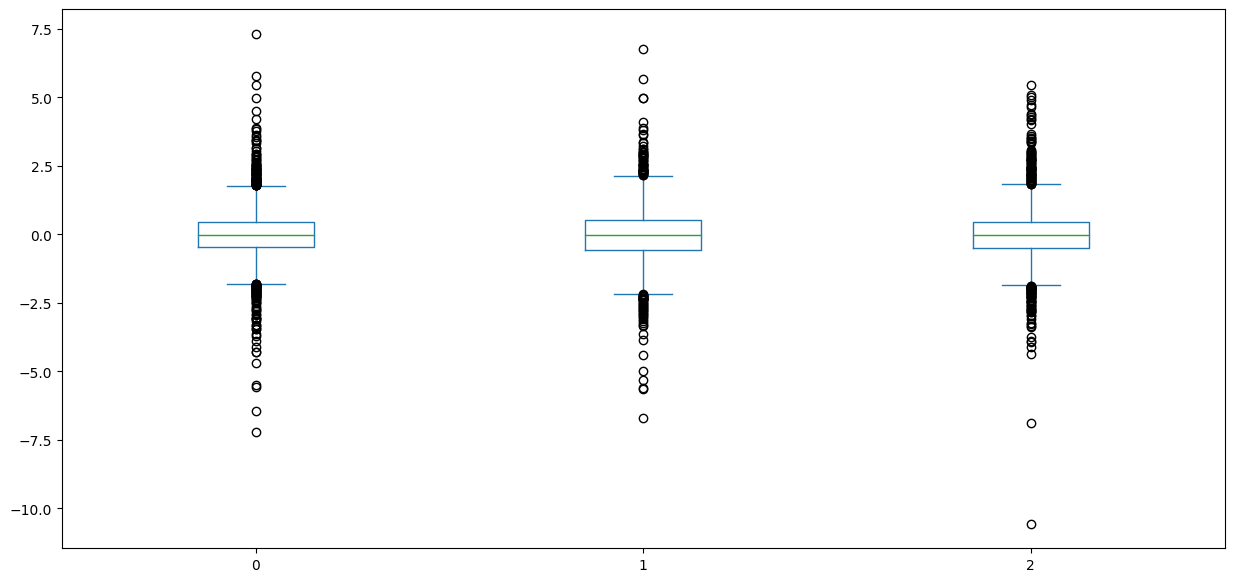

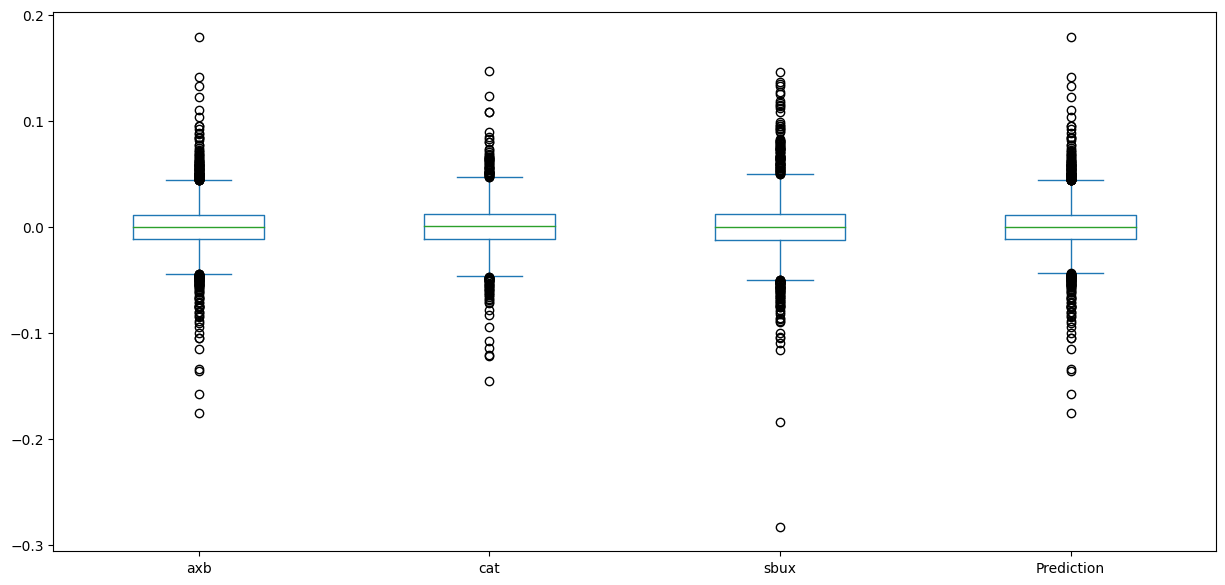

In [375]:
def plot_time_prediction(df):
    forecast_out = int(15)
    to_normalize = input(str('If Normalize? : Y Else N'))
    
    if to_normalize == 'Y':
        X = np.array(df.drop(['Prediction'], 1))
        X = preprocessing.scale(X)
        
        X_forecast = X[-forecast_out:] 
        X = X[:-forecast_out] 

        test = pd.DataFrame(X)
        y = np.array(df['Prediction'])
        y = y[:-forecast_out]
        
        return test.plot(kind='box', figsize=(15,7)) 
    else:
        df['Prediction'] = df[['axb']].shift(-forecast_out) #  label column with data shifted 30 units up
        target = df[['axb']][-forecast_out:]
        return df.plot(kind='box', figsize=(15,7)) #return boxplot of features
    

print(plot_time_prediction(single_stocks_df), plot_time_prediction(single_stocks_df))


/var/folders/1w/cbp5zn894g56r4066l_mngv40000gn/T/ipykernel_43082/1939532391.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


confidence:  -0.014386919574287171


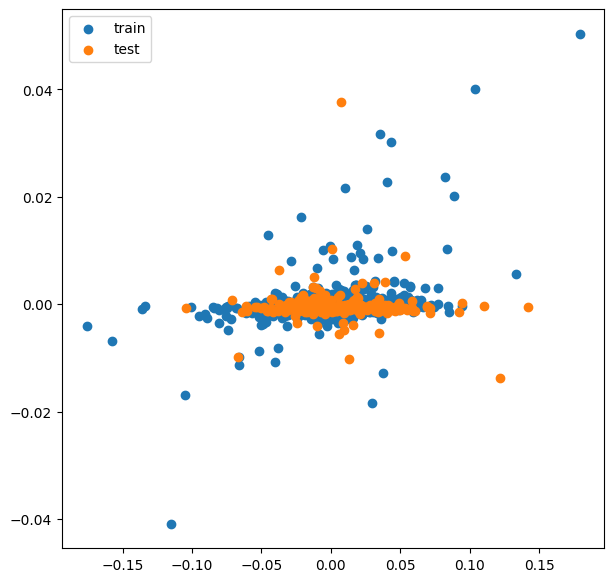

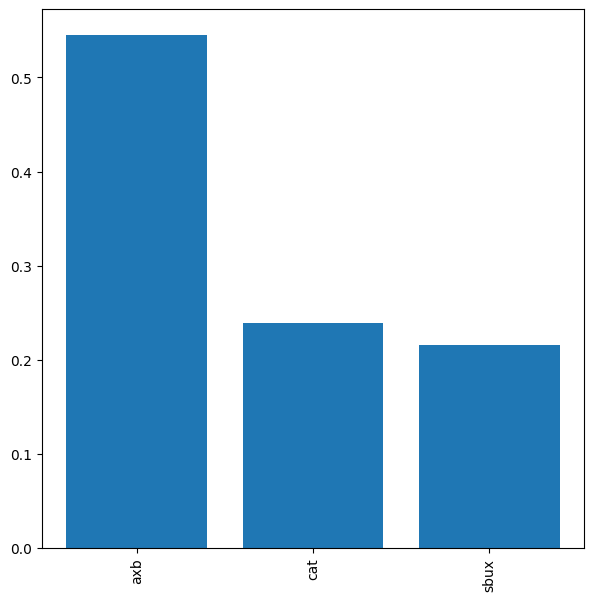

In [386]:
def build_random_regresso(df):
    forecast_out = int(15) # predicting 15 days into future
    X = np.array(df.drop(['Prediction'], 1))
    X = preprocessing.scale(X)

    X_forecast = X[-forecast_out:] 
    X = X[:-forecast_out] 
    y = np.array(df['Prediction'])
    y = y[:-forecast_out]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    # Training
    clf = LinearRegression()
    clf.fit(X_train,y_train)
    # Testing
    confidence = clf.score(X_test, y_test)
    print("confidence: ", confidence)
    # random forest model
    rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
    rfr.fit(X_train, y_train)
    train_predictions = rfr.predict(X_train)
    test_predictions = rfr.predict(X_test)

    # scatter plot with train and test actual vs predictions
    plt.figure(figsize=(7,7))
    plt.scatter(y_train, train_predictions, label='train')
    plt.scatter(y_test, test_predictions, label='test')
    plt.legend()
    
    #return feature importance chart
    importances = rfr.feature_importances_
    labels = df.drop('Prediction', axis=1).columns.values
    plt.figure(figsize=(7,7))
    plt.bar(np.arange(3), importances, tick_label=labels)
    plt.xticks(rotation=90)
    plt.plot(figsize=(15,7))
    return plt.show()

build_random_regresso(single_stocks_df)


/var/folders/1w/cbp5zn894g56r4066l_mngv40000gn/T/ipykernel_43082/1554948036.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


<Figure size 640x480 with 0 Axes>

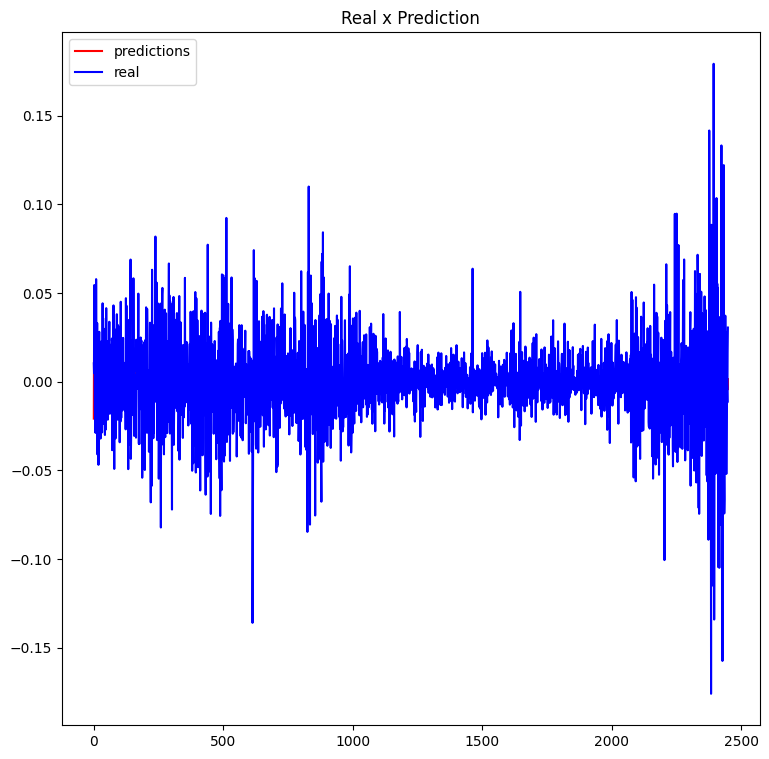

In [391]:
def apply_mml_prediction(df):
    #This isn't looking good... We should normalize it.
    forecast_out = int(15) # predicting 15 days into future
#    forecast_out = int(15) # predicting 15 days into future
    X = np.array(df.drop(['Prediction'], 1))
    X = preprocessing.scale(X)

    X_forecast = X[-forecast_out:] 
    X = X[:-forecast_out] 
    y = np.array(df['Prediction'])
    y = y[:-forecast_out]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
    
    model = MLPRegressor(random_state=42, solver='lbfgs', activation='logistic')
    to_plot_predict = []
    to_plot_real = []

    for i in range(50, len(X), 1):
        X2_train = X[:i]
        X2_test = X[i].reshape(1, -1)
        y2_train = y[:i]
        y2_test = y[i].reshape(1, -1)


        model.fit(X2_train, y2_train)
        predictions = model.predict(X2_test)

        to_plot_predict.append(predictions[0])
        to_plot_real.append(y2_test[0][0])
    plt.clf()
    plt.figure(figsize=(9,9))
    plt.subplot()
    plt.plot(to_plot_predict, c='red', label='predictions')
    plt.plot(to_plot_real, c='blue', label='real')
    plt.title('Real x Prediction')
    plt.legend()
    return plt.show()

apply_mml_prediction(single_stocks_df)

#### Random Forest 

In [452]:
def build_ts_trades():
    s_date= dt.date(2020,10,2)
    e_date = dt.date(2020,12,25)
    pd.date_range(s_date, e_date, freq = 'd')
    df_database = pd.DataFrame(index = pd.date_range(s_date, e_date, freq = 'd'), columns = ['ClientId', 'MsSide', 'Expiry', 'Notional'])
    df_database['Notional'] = random.choice([100000, 200000, 500000, 10000000], size=len(df_database))
    df_database['RFQ_Price'] = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=len(df_database))
    df_database['MsSide'] = random.choice(['Buy', 'Sell'], size=len(df_database))
    df_database['MS_Price'] = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=len(df_database))
    df_database['ClientId'] = random.choice(['GS', 'JP', 'AQR', 'Citi', 'BAML'], size=len(df_database))
    df_database['Expiry'] = pd.date_range(s_date, e_date, periods = len(df_database)) + timedelta(days = 10)
    df_database['SDR_Price'] = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=len(df_database))
    
    
    
    #df_databse.loc['2022-09-01': '2022-09-05','Title'], df_databse.loc['2022-09-06': '2022-09-14','Title'], df_databse.loc['2022-09-01': '2022-09-14','Rating Action'] =  'NEW VERSION: Methodologies main Ref' , 'Methodologies main Ref','Methodologies'
    
    
    return df_database

endf_trades = build_ts_trades()
endf_trades.loc[endf_trades['RFQ_Price'] < endf_trades['MS_Price']]

,ClientId,MsSide,Expiry,Notional,RFQ_Price,MS_Price,SDR_Price
2020-10-02,GS,Sell,2020-10-12,200000,5.5231,5.5421,5.5421
2020-10-03,AQR,Sell,2020-10-13,100000,5.2232,5.5421,5.2232
2020-10-12,GS,Sell,2020-10-22,500000,5.5231,5.5902,5.2232
2020-10-14,GS,Sell,2020-10-24,10000000,5.5231,5.5902,5.5902
2020-10-16,GS,Sell,2020-10-26,200000,5.5231,5.5421,5.5231
2020-10-18,BAML,Buy,2020-10-28,10000000,5.5231,5.5902,5.5231
2020-10-22,BAML,Sell,2020-11-01,500000,5.5231,5.5902,5.5902
2020-10-27,BAML,Sell,2020-11-06,100000,5.2232,5.5902,5.5421
2020-10-28,AQR,Sell,2020-11-07,10000000,5.5231,5.5421,5.2232
2020-10-30,Citi,Buy,2020-11-09,500000,5.5231,5.5421,5.5902


/var/folders/1w/cbp5zn894g56r4066l_mngv40000gn/T/ipykernel_43082/2035520450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: title={'center': 'Correlation Matrix'}>

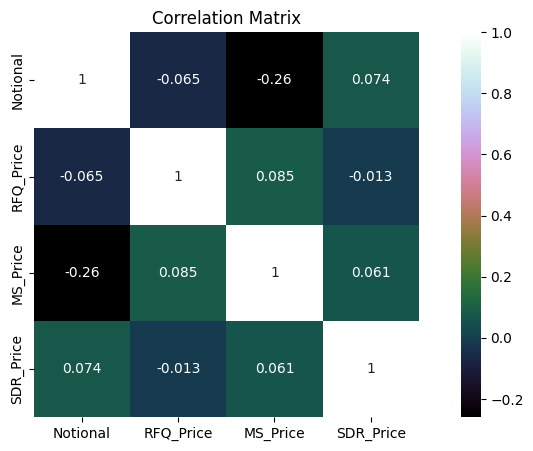

In [486]:
def correlation_among_features(df):
    correlation = df.corr() 
    plt.figure(figsize=(11,5))
    plt.title('Correlation Matrix')
    return sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

def feature_importance(df):
    
    Y = df['SDR_Price']
    df = df.drop(['ClientId', 'MsSide', 'Expiry'], axis = 1)
    X = df.loc[:, df.columns != 'SDR_Price']
    validation_size = 0.2
    seed = 3
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
    

    model = RandomForestRegressor(n_estimators=200, n_jobs=1)
    model.fit(X_train, Y_train)
    
    
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(30).plot(kind='barh')
    plt.title('Ranking of Feature Importance')
    plt.show()
    
    
    #predictions
    predictions = model.predict(X_validation)
    results = mean_squared_error(Y_validation, predictions)
    
    return ""results, r2_score(Y_validation, predictions)


correlation_among_features(endf_trades)


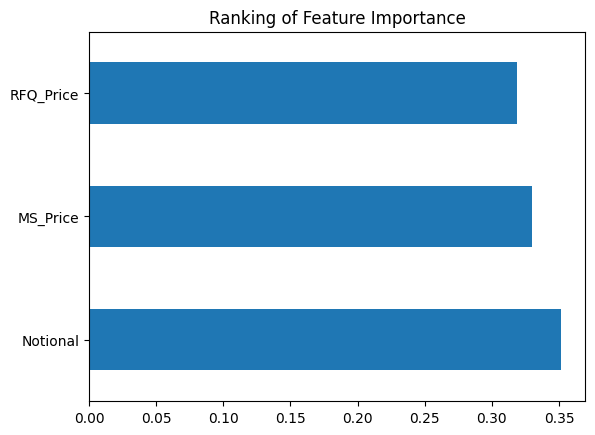

(0.01750177578131152, -0.567814203900566)

In [487]:
feature_importance(endf_trades)    


<AxesSubplot: >

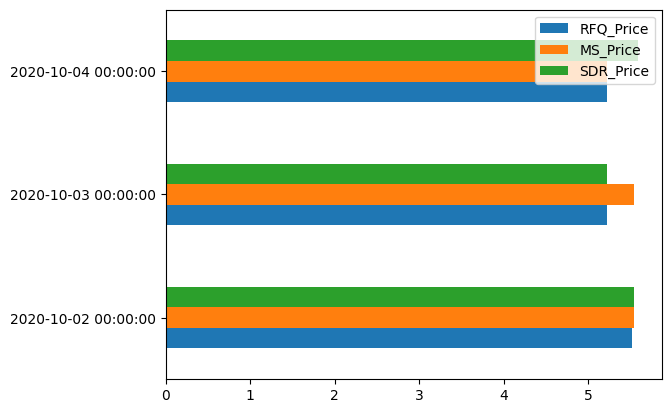

In [507]:
endf_trades[['RFQ_Price', 'MS_Price', 'SDR_Price']].head(3).plot(kind='barh')

array([[<AxesSubplot: xlabel='Notional', ylabel='Notional'>,
        <AxesSubplot: xlabel='RFQ_Price', ylabel='Notional'>,
        <AxesSubplot: xlabel='MS_Price', ylabel='Notional'>,
        <AxesSubplot: xlabel='SDR_Price', ylabel='Notional'>],
       [<AxesSubplot: xlabel='Notional', ylabel='RFQ_Price'>,
        <AxesSubplot: xlabel='RFQ_Price', ylabel='RFQ_Price'>,
        <AxesSubplot: xlabel='MS_Price', ylabel='RFQ_Price'>,
        <AxesSubplot: xlabel='SDR_Price', ylabel='RFQ_Price'>],
       [<AxesSubplot: xlabel='Notional', ylabel='MS_Price'>,
        <AxesSubplot: xlabel='RFQ_Price', ylabel='MS_Price'>,
        <AxesSubplot: xlabel='MS_Price', ylabel='MS_Price'>,
        <AxesSubplot: xlabel='SDR_Price', ylabel='MS_Price'>],
       [<AxesSubplot: xlabel='Notional', ylabel='SDR_Price'>,
        <AxesSubplot: xlabel='RFQ_Price', ylabel='SDR_Price'>,
        <AxesSubplot: xlabel='MS_Price', ylabel='SDR_Price'>,
        <AxesSubplot: xlabel='SDR_Price', ylabel='SDR_Price'>]],
   

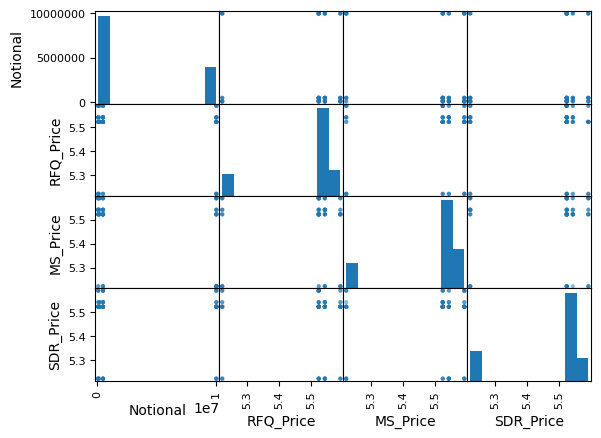

In [509]:
scatter_matrix(endf_trades)

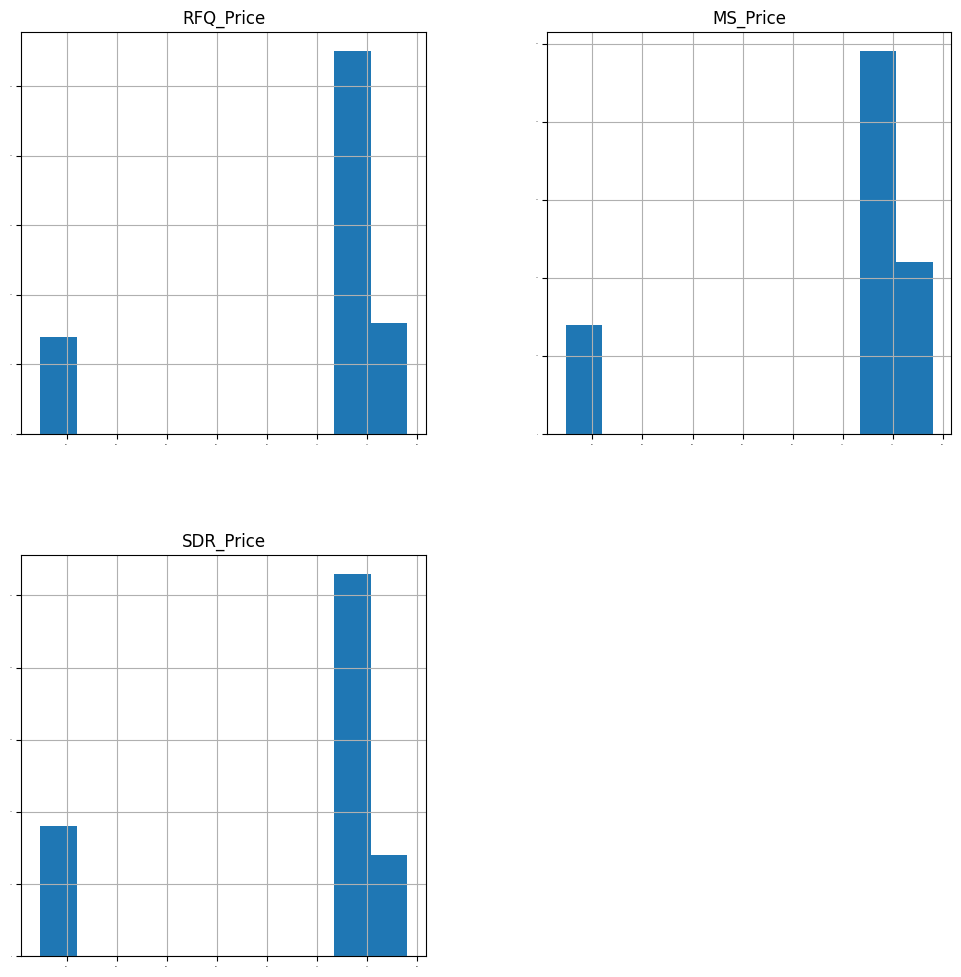

In [502]:
endf_trades[['RFQ_Price', 'MS_Price', 'SDR_Price']].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

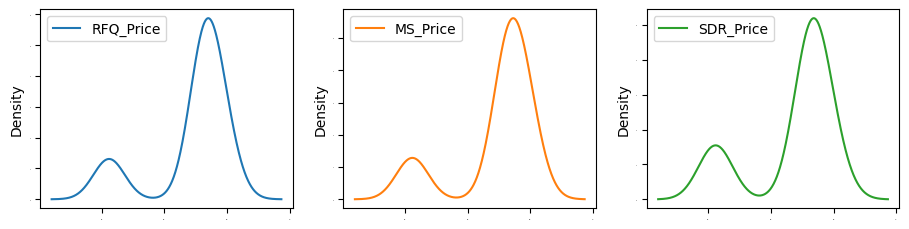

In [505]:
endf_trades[['RFQ_Price', 'MS_Price', 'SDR_Price']].plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

In [659]:
def select_best_feature(df):
    bestfeature = SelectKBest(k=3)
    Y = df['SDR_Price']
    df = df.drop(['ClientId', 'MsSide', 'Expiry'], axis=1)
    X = df.loc[:, df.columns != 'SDR_Price']
    fit = bestfeature.fit(X,Y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    return featureScores.rename({0: 'Feature'})

select_best_feature(endf_trades)

,0,0
Feature,Notional,0.417534
1,RFQ_Price,0.206601
2,MS_Price,0.252149


In [442]:
def load_other_df():
    enter_file_name = str(input('Enter File Name:'))
    df = pd.read_excel(enter_file_name)
    return df
df_sample = load_other_df().head(10)


Enter File Name:SCFP2009panel.xlsx


#### To Do -

1- run a successful logistic & random forest a-z example
2- practice on Interview
3- a bit about VaR and Option trading
4- 

In [618]:
tc = endf_trades.reset_index().drop('index', axis=1)
np.array(tc['MS_Price'] == tc['SDR_Price'])

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True, False,  True, False,
       False,  True, False, False])

In [658]:
def logistic_hit_rate(df):
    df = df.reset_index().drop('index', axis=1)
    X = df[['MS_Price', 'Notional']]
    y = np.array(df['MS_Price'] == df['SDR_Price'])
    clf = LogisticRegression(random_state=0).fit(X,y)
    
    return clf


#Search for MS Trade showing in the Depositary trust clearinig corporation table
#endf_trades.loc[endf_trades['SDR_Price'] != endf_trades['MS_Price']]

x_new = random.choice([5.5902, 5.5231, 5.2232, 5.5421, 5.5231], size=30)
#logistic_hit_rate(endf_trades)
#x_new

y_prob = np.array(logistic_hit_rate(endf_trades).predict_proba(x_new)).reshape((1,-1))
y_prob
#plt.plot(x_new, y_prob[:,1], "g--", label='Correctly predicted')
#plt.plot(x_new, y_prob[:,0], "b--", label='NOT Correctly predicted')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[5.2232 5.5231 5.5231 5.5231 5.2232 5.2232 5.5231 5.5421 5.5231 5.5902
 5.5231 5.5231 5.5421 5.5902 5.2232 5.5902 5.5231 5.2232 5.5421 5.2232
 5.5421 5.5231 5.5902 5.5902 5.5902 5.5902 5.5902 5.5231 5.5231 5.5902].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [648]:
np.arange(-5, 5, 0.1)[0]

-5.0